本文关于biopython的简介

//自【易百教程】，商业转载请联系作者获得授权，非商业请保留原文链接：https://www.yiibai.com/biopython/biopython_sequence_io_operations.html
    
以及biopython Tutorial

#### 序列读入

从Fasta等格式中读入序列。

Biopython提供了一个模块Bio.SeqIO来分别从文件读取序列和向文件写入序列(任何流)。它支持生物信息学中几乎所有可用的文件格式。大多数软件为不同的文件格式提供了不同的方法。但是，Biopython有意识地遵循一种方法，通过SeqRecord对象向用户显示已解析的序列数据。


`Bio.SeqRecord`模块提供SeqRecord来保存序列的元信息以及序列数据本身，如下所示：

- seq − 一个实际的顺序。类型是`Bio.Seq.Seq`
- id − 给定序列的主要标识符，默认类型是字符串。
- name − 序列的名称，默认类型是字符串。
- description − 显示有关该序列的人类可读信息。
- annotations − 有关序列的其他信息的字典。

使用`Bio.SeqIO`读入即可获得`Bio.SeqRecord`类的数据。

Biopython提供了一个函数
- `parse()`可以解析所有生物信息学格式。解析GenBank格式就像在parse方法中更改format选项一样简单。



In [1]:
from Bio import SeqIO
rec_iter = SeqIO.parse(open('Middle East respiratory syndrome coronavirus.txt'),'fasta')
records = [seq_record for seq_record in rec_iter]   
Middle_S = records[0]
print(Middle_S)
print('ID:',Middle_S.id)

ID: lcl|NC_019843.3_cds_YP_009047204.1_1
Name: lcl|NC_019843.3_cds_YP_009047204.1_1
Description: lcl|NC_019843.3_cds_YP_009047204.1_1 [gene=S] [locus_tag=G128_gp02] [db_xref=GeneID:14254594] [protein=spike glycoprotein] [protein_id=YP_009047204.1] [location=21456..25517] [gbkey=CDS]
Number of features: 0
Seq('ATGATACACTCAGTGTTTCTACTGATGTTCTTGTTAACACCTACAGAAAGTTAC...TAA', SingleLetterAlphabet())
ID: lcl|NC_019843.3_cds_YP_009047204.1_1


In [13]:
print(type(seq1),type(Middle_S.seq))

<class 'Bio.Seq.Seq'> <class 'Bio.Seq.Seq'>


`SeqIO.read('spike.txt','fasta')`可以读入只有一个序列的文件

In [18]:
sasr2Spike = SeqIO.read('2019nCoVspike.txt','fasta')
print(sasr2Spike)

ID: lcl|NC_045512.2_cds_YP_009724390.1_1
Name: lcl|NC_045512.2_cds_YP_009724390.1_1
Description: lcl|NC_045512.2_cds_YP_009724390.1_1 [gene=S] [locus_tag=GU280_gp02] [db_xref=GeneID:43740568] [protein=surface glycoprotein] [protein_id=YP_009724390.1] [location=21563..25384] [gbkey=CDS]
Number of features: 0
Seq('ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTT...TAA', SingleLetterAlphabet())


#### 双序列比对


对于Biopython而言

The names of the alignment functions in this module follow the
    convention
    <alignment type>XX
    where <alignment type> is either "global" or "local" and XX is a 2
    character code indicating the parameters it takes.  The first
    character indicates the parameters for matches (and mismatches), and
    the second indicates the parameters for gap penalties.
    
    The match parameters are::
    
        CODE  DESCRIPTION
        x     No parameters. Identical characters have score of 1, otherwise 0. match为1分，mismatch为0分
        m     A match score is the score of identical chars, otherwise mismatch
              score.
        d     A dictionary returns the score of any pair of characters.
        c     A callback function returns scores.
    
    The gap penalty parameters are::
    
        CODE  DESCRIPTION
        x     No gap penalties. 没有空位罚分
        s     Same open and extend gap penalties for both sequences.
        d     The sequences have different open and extend gap penalties.
        c     A callback function returns the gap penalties.
    
    All the different alignment functions are contained in an object
    ``align``. For example:
    
    
虽然这么多可以使用得比对函数。
但是一般常用得是以下

- `globalxx(seq1,seq2)` match为1分，mismatch为0分，空位罚分为0 
- `globalms(seq1,seq2,2,-1,-0.5,-0.1)`  指定match为2分，错配罚分为1分，空位罚分0.5，延伸空位罚分0.1
- `globaldx(seq1,seq2,matrix)` 通过指定打分矩阵，一般是蛋白质序列得比对采用。

对于不知道如何使用得 直接调用`help(pairwise2.align.globaldc)`来查询相应得使用帮助

In [11]:
from Bio.Seq import Seq
from Bio import pairwise2
seq1 = Seq('ACACACTA')
seq2 =Seq('AGCACACA')
seq3 = Seq('ATCCACA')

##### gloablxx

In [3]:
alignments = pairwise2.align.globalxx(seq1,seq2)

In [25]:
for a in pairwise2.align.globalxx(seq1, seq2):
    print(format_alignment(*a))

A-CACACTA
| ||||| |
AGCACAC-A
  Score=7



使用`format_alignment(*alignments[0])`可以格式化显示比对结果
但是仅仅会显示匹配得部分，**不会显示全部序列**

In [17]:
from Bio.pairwise2 import format_alignment
print(format_alignment(*alignments[0]))

A-CACACTA
| ||||| |
AGCACAC-A
  Score=7



##### globalms

如果要指定相关得罚分则需要使用

指定match为2分，错配罚分为1分，空位罚分0.5，延伸空位罚分0.1

`pairwise2.align.globalms(seq1,seq2,2,1,-0.5,-0.1)`

In [33]:
for a in pairwise2.align.globalms(seq1,seq2,2,-1,-0.5,-0.1):
    print(format_alignment(*a)) 

A-CACACTA
| ||||| |
AGCACAC-A
  Score=13



##### globaldx

In [45]:
#导入打分矩阵相关得信息
from Bio.SubsMat import MatrixInfo as matlist
#选择pam30作为打分矩阵
PAM30= matlist.pam30

for a in pairwise2.align.globaldx('KEVLA','EVL',PAM30):
    print(format_alignment(*a,full_sequences=True))

KEVLA
 ||| 
-EVL-
  Score=22



#### 局部比对
与全局比对没区别。

注意gloablxx 改为localxx即可。

In [27]:
alignments = pairwise2.align.localxx('ACCGT','ACG')
for i in alignments:
    print(format_alignment(*i))

1 ACCG
  | ||
1 A-CG
  Score=3

1 ACCG
  || |
1 AC-G
  Score=3



给format_alignment()指定位置参数 full_sequences =True即可显示完整得序列

In [28]:
for i in alignments:
    print(format_alignment(*i,full_sequences=True))

ACCGT
| || 
A-CG-
  Score=3

ACCGT
|| | 
AC-G-
  Score=3



#### 打分矩阵

`from Bio.SubsMat import MatrixInfo as matlist`导入矩阵相关得信息， 从中选择需要得矩阵即可

In [34]:
from Bio.SubsMat import MatrixInfo as matlist

In [47]:
#选择pam30
PAM30= matlist.pam30
PAM30

{('W', 'F'): -4,
 ('L', 'R'): -8,
 ('S', 'P'): -2,
 ('V', 'T'): -3,
 ('Q', 'Q'): 8,
 ('N', 'A'): -4,
 ('Z', 'Y'): -9,
 ('W', 'R'): -2,
 ('Q', 'A'): -4,
 ('S', 'D'): -4,
 ('H', 'H'): 9,
 ('S', 'H'): -6,
 ('H', 'D'): -4,
 ('L', 'N'): -7,
 ('W', 'A'): -13,
 ('Y', 'M'): -11,
 ('G', 'R'): -9,
 ('Y', 'I'): -6,
 ('Y', 'E'): -8,
 ('B', 'Y'): -6,
 ('Y', 'A'): -8,
 ('V', 'D'): -8,
 ('B', 'S'): -1,
 ('Y', 'Y'): 10,
 ('G', 'N'): -3,
 ('E', 'C'): -14,
 ('Y', 'Q'): -12,
 ('Z', 'Z'): 6,
 ('V', 'A'): -2,
 ('C', 'C'): 10,
 ('M', 'R'): -4,
 ('V', 'E'): -6,
 ('T', 'N'): -2,
 ('P', 'P'): 8,
 ('V', 'I'): 2,
 ('V', 'S'): -6,
 ('Z', 'P'): -4,
 ('V', 'M'): -1,
 ('T', 'F'): -9,
 ('V', 'Q'): -7,
 ('K', 'K'): 7,
 ('P', 'D'): -8,
 ('I', 'H'): -9,
 ('I', 'D'): -7,
 ('T', 'R'): -6,
 ('P', 'L'): -7,
 ('K', 'G'): -7,
 ('M', 'N'): -9,
 ('P', 'H'): -4,
 ('F', 'Q'): -13,
 ('Z', 'G'): -5,
 ('X', 'L'): -6,
 ('T', 'M'): -4,
 ('Z', 'C'): -14,
 ('X', 'H'): -5,
 ('D', 'R'): -10,
 ('B', 'W'): -10,
 ('X', 'D'): -5,
 ('Z', 'K'):

#### 矩阵作图 （dot plots）

核酸dot plots。
可以直观查看两条序列的配对情况的方法——dot plots

把两条序列分别放在X和Y轴，有序的从左到右，从下到上的进行字符的比较，如果两个字符相同则在对应的坐标打上一个点。便可以得到对角线作图的结果。

**对于序列中存在的相同子序列，会在结果中出现一条过原点的对角线**

**对于两条互为相反序列的子序列则会以反对角线的形式呈现**

In [19]:
from Bio import SeqIO
from Bio.Seq import Seq

with open('Middle East respiratory syndrome coronavirus.txt') as f:
    rec_one = [i for i in SeqIO.parse(f,'fasta')][0]
with open('2019nCoVspike.txt') as f:
    rec_two = [i for i in SeqIO.parse(f,'fasta')][0]
               


1032 unique matches


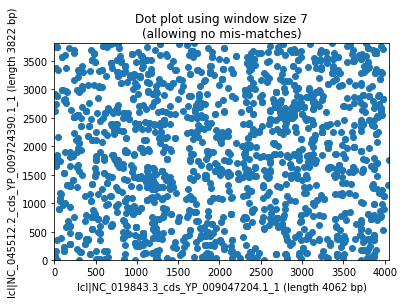

In [20]:
window = 7
dict_one = {}
dict_two = {}
for (seq, section_dict) in [ (str(rec_one.seq).upper(), dict_one),
(str(rec_two.seq).upper(), dict_two),
]:
    for i in range(len(seq) - window):
        section = seq[i : i + window]
        try:
            section_dict[section].append(i)
        except KeyError:
            section_dict[section] = [i]
# Now find any sub-sequences found in both sequences

matches = set(dict_one).intersection(dict_two)
print("%i unique matches" % len(matches))
#In order to use the pylab.scatter() we need separate lists for the x and y co-ordinates:
# Create lists of x and y co-ordinates for scatter plot
x = []
y = []
for section in matches:
    for i in dict_one[section]:
        for j in dict_two[section]:
            x.append(i)
            y.append(j)
#We are now ready to draw the revised dot plot as a scatter plot:
import pylab
pylab.cla() # clear any prior graph
pylab.gray()
pylab.scatter(x, y)
pylab.xlim(0, len(rec_one) - window)

pylab.ylim(0, len(rec_two) - window)
pylab.xlabel("%s (length %i bp)" % (rec_one.id, len(rec_one)))
pylab.ylabel("%s (length %i bp)" % (rec_two.id, len(rec_two)))
pylab.title("Dot plot using window size %i\n(allowing no mis-matches)" % window)
pylab.show()

In [4]:
from Bio import Align 

In [5]:
help(Align)

Help on package Bio.Align in Bio:

NAME
    Bio.Align - Code for dealing with sequence alignments.

DESCRIPTION
    One of the most important things in this module is the MultipleSeqAlignment
    class, used in the Bio.AlignIO module.

PACKAGE CONTENTS
    AlignInfo
    Applications (package)
    _aligners
    substitution_matrices (package)

CLASSES
    _algorithms.PairwiseAligner(builtins.object)
        PairwiseAligner
    builtins.object
        MultipleSeqAlignment
        PairwiseAlignment
        PairwiseAlignments
    
    class MultipleSeqAlignment(builtins.object)
     |  MultipleSeqAlignment(records, alphabet=None, annotations=None, column_annotations=None)
     |  
     |  Represents a classical multiple sequence alignment (MSA).
     |  
     |  By this we mean a collection of sequences (usually shown as rows) which
     |  are all the same length (usually with gap characters for insertions or
     |  padding). The data can then be regarded as a matrix of letters, with wel

A-CACACTA
| ||||| |
AGCACAC-A
  Score=7



In [12]:
from Bio import pairwise2
from Bio.Seq import Seq
seq1 =Seq('GCATGCU')
seq2 = Seq('GATTACA')
aliments = pairwise2.align.globalms(seq1,seq2,1,-1,-1,-1)
for i in aliments:
    print(pairwise2.format_alignment(*i))

GCATG-CU
| ||. |.
G-ATTACA
  Score=0

GCAT-GCU
| || .|.
G-ATTACA
  Score=0

GCA-TGCU
| | |.|.
G-ATTACA
  Score=0

